In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import tensorflow as tf
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import random
%matplotlib inline

0.2962426376083553


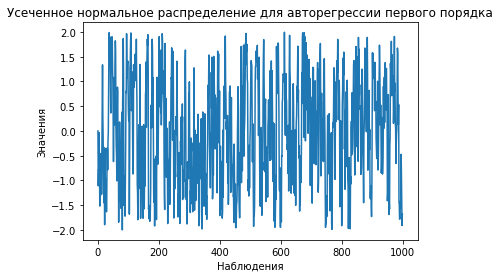

In [2]:
mu = 0
sigma = 1
a = -2
b = 2

def generate_truncated_normal(mu, sigma, a, b):
    lower, upper = (a - mu) / sigma, (b - mu) / sigma
    X = truncnorm(lower, upper, loc=mu, scale=sigma)
    return X.rvs()

nobs = 1000
start_values = [0]

for i in range(nobs):
    prev_value = start_values[-1]
    new_value = generate_truncated_normal(mu=prev_value, sigma=sigma, a=a, b=b)
    start_values.append(new_value)

df = pd.DataFrame({'AR(1)': start_values[:-1]})
plt.title('Усеченное нормальное распределение для авторегрессии первого порядка')
plt.xlabel('Наблюдения')
plt.ylabel('Значения')
plt.plot(df)
print(generate_truncated_normal(0,1,-2,2))

In [3]:
a = 0.4


def yul_walker_inseption(c):
    Var1 = 0
    Var2 = 0
    sigma_k_1 = 0
    sigma_k = 0
    a_k_1 = 0
    a_k = 0
    C_cens = []
    x = []
    y = [0 for _ in range(1000)]
    x.append(-2.8)
    for t in range(0, 1000):
        u_t = random.normalvariate(mu=0, sigma=1)
        x_t = a * x[t] + u_t
        x.append(x_t)
    for i in range(1000):
        if x[i] < c:
            y[i] = x[i]       
        else:
            y[i] = c
            C_cens.append(i)
    c1 = 0
    c0 = 0
    c0 += y[999] * y[999]
    for t in range(999):
        c1 += y[t] * y[t + 1] 
        c0 += y[t] ** 2
    c1 /= (1000 - 1)
    c0 /= (1000)
    a_k_1 = c1 / (c0)
    sigma_k_1 = c0 * (1 - a_k_1 ** 2)
    k = 1 
    while (sigma_k_1 - sigma_k) ** 2 + (a_k_1 - a_k) ** 2 > 0.001:
        y_new = [0 for _ in range(1000)]
        for i in range(len(C_cens)):
            std_k_1  = np.sqrt(sigma_k) * (1 - pow(a_k, (2 * k)))
            mu_new = pow(a_k, k) * x[C_cens[i] - 1]
            x[C_cens[i]] = truncnorm(c, 3.5, loc=mu_new, scale=std_k_1 ** 2).rvs() #generate_truncated_normal(mu_new, std_k_1 ** 2, c, 3.5)
        C_cens = []
        for i in range(1000):
            if x[i] < c:
                y[i] = x[i]       
            else:
                y[i] = c
                C_cens.append(i)
        c1 = 0
        c0 = 0
        c0 += y[999] * y[999]
        for t in range(999):
            c1 += y[t] * y[t + 1] 
            c0 += y[t] ** 2
        c1 /= (1000 - 1)
        c0 /= (1000)
        a_k = a_k_1
        sigma_k = sigma_k_1
        a_k_1 = c1 / (c0)
        sigma_k_1 = c0 * (1 - a_k_1 ** 2)
        k += 1
#     print(k)
#     print(a_k_1, a_k) 
#     print(sigma_k_1, sigma_k)
    Var1 = sigma_k_1
    Var2 = a_k_1                               
    return Var1, Var2

In [4]:
var_a = []
var_sigma = [] 
C_2 = []
temp_2 = -2.5
for i in range(21):
    v_1 = 0
    v_2 = 0
    for j in range(100):
        Var1, Var2 = yul_walker_inseption(temp_2)
        v_1 += (Var1 - 1) ** 2
        v_2 += (Var2 - 0.4) ** 2
    var_sigma.append(v_1 / 100)
    var_a.append(v_2 / 100)
    C_2.append(temp_2)
    temp_2 += 0.25
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [73]:
data_cens = {'Коэффициент C': C_2 , 'Вариaция оценки a': var_a, 'Вариация дисперсии': var_sigma} 

df = pd.DataFrame(data_cens)

In [85]:
df1 = df.iloc [0:6,:]
df2 = df.iloc [14:20,:]
df = pd.concat([df1, df2])

In [86]:
df.transpose()

,0,1,2,3,4,5,14,15,16,17,18,19
Коэффициент C,-2.500000,-2.250000,-2.000000,-1.750000,-1.500000,-1.250000,1.000000,1.250000,1.500000,1.750000,2.000000,2.250000
Вариaция оценки a,0.359381,0.358492,0.356682,0.352513,0.343726,0.326868,0.001507,0.003452,0.004336,0.004141,0.003187,0.001941
Вариация дисперсии,0.987103,0.974483,0.955453,0.922145,0.872154,0.808998,0.162089,0.107880,0.066702,0.038228,0.017897,0.008486


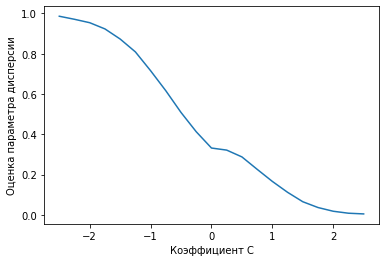

In [5]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C_2, var_sigma)

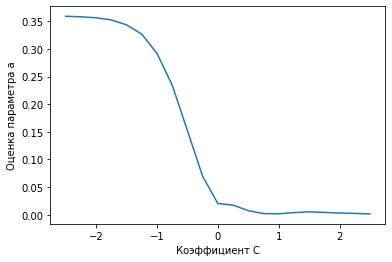

In [6]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра a')
plt.plot(C_2, var_a)

In [ ]:
var_a_cens_2 = []
var_sigma_cens_2 = [] 
C_2 = []
temp_2 = -2.5
for i in range(21):
    Var1, Var2 = yul_walker_inseption(temp_2)
    var_a_cens_2.append(Var1)
    var_sigma_cens_2.append(Var2)
    C_2.append(temp_2)
    temp_2 += 0.25

In [10]:
C_5 = []

In [11]:
for i in range(len(var_sigma)):
    C_5.append(var_sigma[i] - var_sigma_cens_3[i])

Text(-2.7, 0.1, 'red - константное цензурирование')

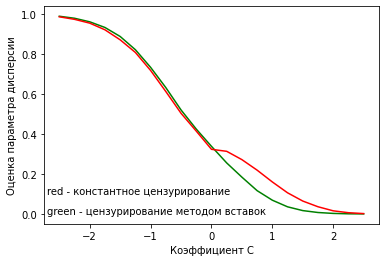

In [81]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C_3, var_sigma_cens_3, color='green')
plt.plot(C_3, var_sigma, color='red')
plt.text (-2.7, 0.00, 'green - цензурирование методом вставок')
plt.text (-2.7, 0.10,'red - константное цензурирование')

In [7]:
u = [] 
a = 0.4
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens_2(c):
    Var1 = 0
    Var2 = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1 = 0
        c0 = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        for i in range(1000):
            if x[i] < c:
                y[i] = x[i]
            else:
                y[i] = c
        c0 += y[999] * y[999]
        for t in range(999):
            c1 += y[t] * y[t + 1] 
            c0 += y[t] ** 2
        c1 /= (1000 - 1)
        c0 /= (1000)
        a_estim = c1 / (c0)
        Var1 += (a_estim - a) ** 2
        var_estim = c0 * (1 - a_estim ** 2)
        Var2 += (var_estim - 1) ** 2
    Var1 /= 1000
    Var2 /= 1000
    return Var1, Var2

In [8]:
var_a_cens_3 = []
var_sigma_cens_3 = [] 
C_3 = []
temp_3 = -2.5
for i in range(21):
    Var1, Var2 = yul_walker_cens_2(temp_3)
    var_a_cens_3.append(Var1)
    var_sigma_cens_3.append(Var2)
    C_3.append(temp_3)
    temp_3 += 0.25

In [12]:
data_cens = {'Коэффициент C': C_3, 'Вариaция оценки a при помощи метода замены': \
             var_a, 'Вариация дисперсии при помощи метода замены': var_sigma,\
            'Вариaция оценки a по методу вставок': var_a_cens_3, \
             'Вариация дисперсии по методу вставок': var_sigma_cens_3,\
            'Разница вариаций': C_5} 
 
dff = pd.DataFrame(data_cens)

In [13]:
dff

,Коэффициент C,Вариaция оценки a при помощи метода замены,Вариация дисперсии при помощи метода замены,Вариaция оценки a по методу вставок,Вариация дисперсии по методу вставок,Разница вариаций
0,-2.50,0.359326,0.985953,0.359524,0.990071,-0.004119
1,-2.25,0.358273,0.970782,0.358797,0.979627,-0.008846
2,-2.00,0.356564,0.953841,0.357225,0.962684,-0.008843
3,-1.75,0.352601,0.923018,0.353538,0.932690,-0.009672
4,-1.50,0.343784,0.872774,0.345615,0.886997,-0.014222
5,-1.25,0.326922,0.808968,0.329199,0.822253,-0.013285
6,-1.00,0.292130,0.715504,0.296473,0.734853,-0.019348
7,-0.75,0.234589,0.615993,0.239112,0.632873,-0.016880
8,-0.50,0.152348,0.508093,0.156365,0.525641,-0.017548
9,-0.25,0.069576,0.412352,0.072182,0.426612,-0.014260


In [14]:
df1 = dff.iloc [0:6,:]
df2 = dff.iloc [14:20,:]
dff = pd.concat([df1, df2])

In [15]:
dff.transpose()

,0,1,2,3,4,5,14,15,16,17,18,19
Коэффициент C,-2.500000,-2.250000,-2.000000,-1.750000,-1.500000,-1.250000,1.000000,1.250000,1.500000,1.750000,2.000000,2.250000
Вариaция оценки a при помощи метода замены,0.359326,0.358273,0.356564,0.352601,0.343784,0.326922,0.001724,0.003825,0.005267,0.004154,0.002989,0.002390
Вариация дисперсии при помощи метода замены,0.985953,0.970782,0.953841,0.923018,0.872774,0.808968,0.165922,0.111821,0.065039,0.036236,0.017771,0.008011
Вариaция оценки a по методу вставок,0.359524,0.358797,0.357225,0.353538,0.345615,0.329199,0.001094,0.001013,0.000941,0.000860,0.000864,0.000891
Вариация дисперсии по методу вставок,0.990071,0.979627,0.962684,0.932690,0.886997,0.822253,0.070378,0.038810,0.019017,0.009771,0.004859,0.002893
Разница вариаций,-0.004119,-0.008846,-0.008843,-0.009672,-0.014222,-0.013285,0.095544,0.073011,0.046022,0.026464,0.012912,0.005118


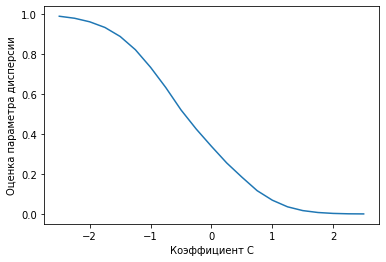

In [64]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C_3, var_sigma_cens_3)

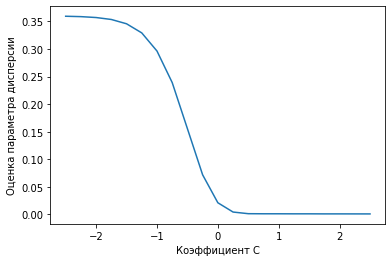

In [53]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C_3, var_a_cens_3)